In [136]:
import pandas as pd
from numpy import percentile
import statistics
from pandas import DataFrame as Df

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df= pd.read_csv("C:\\Users\\Mishan RG\\Desktop\\planets.csv")

In [139]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [140]:
df.fillna(value= 0 ,inplace=True)

In [141]:
quartiles = percentile(df['distance'], [25, 50, 75])

In [142]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,0.00,172.00,2006
1031,Transit,1,2.615864,0.00,148.00,2007
1032,Transit,1,3.191524,0.00,174.00,2007
1033,Transit,1,4.125083,0.00,293.00,2008


In [143]:
maxes = Df(df['distance'].groupby(df['method']).max())

In [144]:
maxes

,distance
method,
Astrometry,20.77
Eclipse Timing Variations,500.00
Imaging,165.00
Microlensing,2800.00
Orbital Brightness Modulation,1180.00
Pulsar Timing,1200.00
Pulsation Timing Variations,0.00
Radial Velocity,354.00
Transit,3200.00


In [145]:
data_min, data_max = df['distance'].min(), df['distance'].max()

In [146]:
data_min, data_max

(0.0, 3200.0)

In [147]:
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 9.760
Median: 40.850
Q3: 130.720
Max: 3200.000


In [148]:
Radial_Velocity = df[df['method']=='Radial Velocity']['distance']
Imaging = df[df['method']=='Imaging']['distance']
Echlipse = df[df['method']=='Eclipse Timing Variations']['distance']
Transit = df[df['method']=='Transit']['distance']


{'whiskers': [<matplotlib.lines.Line2D at 0x2ecfa2e9fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2ecfa2fedc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ecfa2e9e48>,
 'medians': [<matplotlib.lines.Line2D at 0x2ecfa2fef48>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ecfa871c88>,
 'means': []}

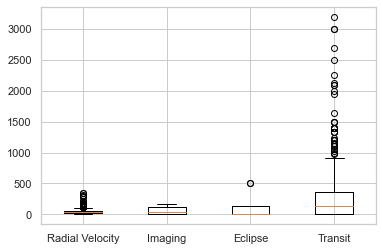

<Figure size 1152x576 with 0 Axes>

In [149]:
fig = plt.figure()
plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.boxplot([Radial_Velocity,Imaging,Echlipse,Transit], labels=['Radial Velocity', 'Imaging','Eclipse','Transit'])

In [150]:
import matplotlib.pyplot as plt
import numpy as np

(0.0, 370.0)

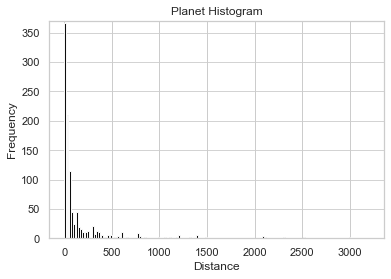

In [151]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['distance'], bins='auto', color='#000',
                            alpha=0.95, rwidth=0.85)
plt.grid(axis='y', alpha=0.85)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Planet Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

No handles with labels found to put in legend.


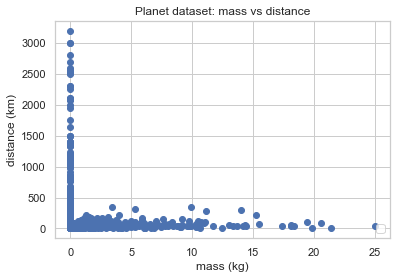

In [152]:
plt.scatter(df['mass'],df['distance'])
plt.xlabel('mass (kg)')
plt.ylabel('distance (km)')
plt.title('Planet dataset: mass vs distance')
plt.legend(loc='lower right')

plt.show()

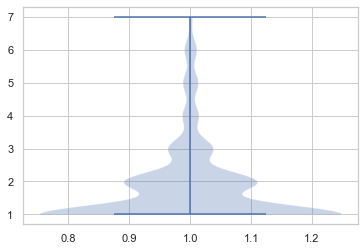

In [153]:
d= df.drop('method',axis = 1)
plt.violinplot(d['number'])
plt.show()

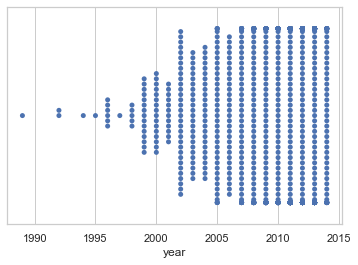

In [154]:
sns.set(style="whitegrid")
tips = sns.load_dataset("planets")
ax = sns.swarmplot(x=tips["year"])